# 6. Weight Initializations & Activation Functions

## Recap of Logistic Regression
<img src="./images/cross_entropy_final_4.png" alt="deeplearningwizard" style="width: 900px;"/>

## Recap of Feedforward Neural Network Activation Function
<img src="./images/logistic_regression_comparison_nn5.png" alt="deeplearningwizard" style="width: 900px;"/>

#### Sigmoid (Logistic)
- $\sigma(x) = \frac{1}{1 + e^{-x}}$
- Input number $\rightarrow$ [0, 1]
    - Large negative number $\rightarrow$ 0
    - Large positive number $\rightarrow$ 1
- Cons: 
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - Solution: Have to carefully initialize weights to prevent this
       

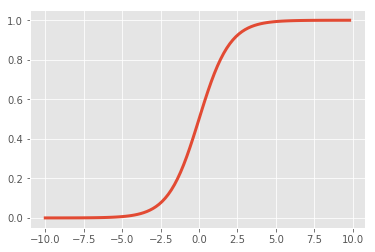

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+np.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.style.use('ggplot')
plt.plot(x,sig, linewidth=3.0)

#### Tanh
- $\tanh(x) = 2 \sigma(2x) -1$
    - A scaled sigmoid function
- Input number $\rightarrow$ [-1, 1]
- Cons: 
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - **Solution**: Have to carefully initialize weights to prevent this


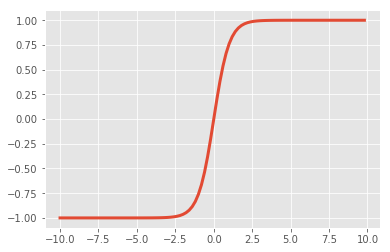

In [2]:
x = np.arange(-10., 10., 0.2)
tanh = np.dot(2, sigmoid(np.dot(2, x))) - 1

plt.plot(x,tanh, linewidth=3.0)

#### ReLUs
- $f(x) = \max(0, x)$
- Pros:
    1. Accelerates convergence $\rightarrow$ **train faster**
    2. **Less computationally expensive operation** compared to Sigmoid/Tanh exponentials
- Cons:
    1. Many ReLU units "die" $\rightarrow$ **gradients = 0** forever
        - **Solution**: careful learning rate and weight initialization choice

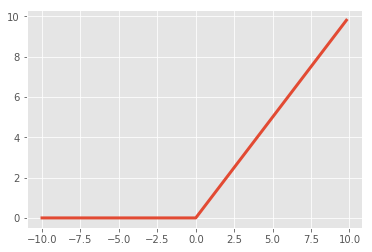

In [3]:
x = np.arange(-10., 10., 0.2)
relu = np.maximum(x, 0)

plt.plot(x,relu, linewidth=3.0)

## Why do we need weight initializations or new activation functions?
- **To prevent vanishing/exploding gradients**

### Case 1: Sigmoid/Tanh
- **Problem**
    - If variance of input too large: gradients = 0 (vanishing gradients)
    - If variance of input too small: linear $\rightarrow$ gradients = constant value
- **Solutions**
    - Want a constant variance of input to achieve non-linearity $\rightarrow$ unique gradients for unique updates
        - Xavier Initialization (good constant variance for Sigmoid/Tanh)
        - ReLU or Leaky ReLU

### Case 2: ReLU
- **Solution to Case 1**
    - Regardless of variance of input: gradients = 0 or 1 
- **Problem**
    - But those with 0: no updates ("dead ReLU units") 
    - Has unlimited output size with input > 0 (explodes gradients subsequently)
- **Solutions**
    - He Initialization (good constant variance)
    - Leaky ReLU

### Case 3: Leaky ReLU
- **Solution to Case 2**
    - Solves the 0 signal issue when input < 0 
![](./images/leaky_relu_compare2.png)
- **Problem**
    - Has unlimited output size with input > 0 (explodes)
- **Solution**
    - He Initialization (good constant variance)

## Summary of weight initialization solutions to activations
- Tanh/Sigmoid vanishing gradients can be solved with Xavier initialization
    - Good range of constant variance
- ReLU/Leaky ReLU exploding gradients can be solved with He initialization
    - Good range of constant variance

## Types of weight intializations

#### Zero Initialization: set all weights to 0 
- Every neuron in the network computes the same output $\rightarrow$ computes the same gradient $\rightarrow$ same parameter updates 

#### Normal Initialization: set all weights to random small numbers
- Every neuron in the network computes different output $\rightarrow$ computes different gradient $\rightarrow$ different parameter updates 
- "Symmetry breaking" 
- Problem: variance that grows with the number of inputs

#### Lecun Initialization: normalize variance
- Solves growing variance with the number of inputs $\rightarrow$ constant variance 
- Look at a simple feedforward neural network
![](./images/nn2.png)

**Some equations to explain**
- $Y = AX + B$
- $y = a_1x_1 + a_2x_2 + \cdot + a_n x_n + b$
- $Var(y) = Var(a_1x_1 + a_2x_2 + \cdot + a_n x_n + b)$
- $Var(a_i x_i) = E(x_i)^2 Var(a_i) + E(a_i)^2Var(x_i) + Var(a_i)Var(x_i)$
    - General term, you might be more familiar with the following
        - $Var(XY) = E(X)^2 Var(Y) + E(Y)^2Var(X) + Var(X)Var(Y)$
    - $E(x_i)$: expectation/mean of $x_i$
    - $E(a_i)$: expectation/mean of $a_i$
- Assuming inputs/weights drawn i.i.d. with Gaussian distribution of mean=0
    - $E(x_i) = E(a_i) = 0$
    - $Var(a_i x_i) = Var(a_i)Var(x_i)$
- $Var(y) = Var(a_1)Var(x_1) + \cdot + Var(a_n)Var(x_n) $
    - Since the bias, b, is a constant, $Var(b) = 0$
- Since i.i.d.
    - $Var(y) = n \times Var(a_i)Var(x_i) $
- Since we want constant variance where $ Var(y) = Var(x_i) $
    - $1 = nVar(a_i)$
    - $Var(a_i) = \frac{1}{n}$
- This is essentially [Lecun initialization, from his paper titled "Efficient Backpropagation"](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)
    - We draw our weights i.i.d. with mean=0 and variance = $\frac{1}{n}$
    - Where $n$ is the number of **input units** in the weight tensor

#### Improvements to Lecun Intialization
- They are essentially slight modifications to Lecun'98 initialization
- Xavier Intialization
    - Works better for layers with Sigmoid activations 
    - $var(a_i) = \frac{1}{n_{in} + n_{out}}$
        - Where $n_{in}$ and $n_{out}$ are the number of input and output units in the weight tensor respectively
- Kaiming Initialization
    - Works better for layers with ReLU or LeakyReLU activations 
    - $var(a_i) = \frac{2}{n_{in}}$
 

#### Summary of  weight initializations
- Normal Distribution
- Lecun Normal Distribution
- Xavier (Glorot) Normal Distribution 
- Kaiming (He) Normal Distribution

## Weight Initializations with PyTorch

### Normal Initialization: Tanh Activation

In [4]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Linear weight, W,  Y = WX + B
        nn.init.normal_(self.fc1.weight, mean=0, std=1)
        # Non-linearity
        self.tanh = nn.Tanh()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
        nn.init.normal_(self.fc2.weight, mean=0, std=1)
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

'''
STEP 7: INSTANTIATE STEP LEARNING SCHEDULER CLASS
'''
# step_size: at how many multiples of epoch you decay
# step_size = 1, after every 2 epoch, new_lr = lr*gamma 
# step_size = 2, after every 2 epoch, new_lr = lr*gamma 

# gamma = decaying factor
scheduler = StepLR(optimizer, step_size=1, gamma=0.96)

'''
STEP 8: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    # Decay Learning Rate
    scheduler.step()
    # Print Learning Rate
    print('Epoch:', epoch,'LR:', scheduler.get_lr())
    for i, (images, labels) in enumerate(train_loader):
        # Load images as tensors with gradient accumulation abilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
               # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()

            accuracy = 100. * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch: 0 LR: [0.1]
Iteration: 500. Loss: 0.5192779302597046. Accuracy: 87.9
Epoch: 1 LR: [0.096]
Iteration: 1000. Loss: 0.4060308337211609. Accuracy: 90.15
Epoch: 2 LR: [0.09216]
Iteration: 1500. Loss: 0.2880493104457855. Accuracy: 90.71
Epoch: 3 LR: [0.08847359999999999]
Iteration: 2000. Loss: 0.23173095285892487. Accuracy: 91.99
Epoch: 4 LR: [0.084934656]
Iteration: 2500. Loss: 0.23814399540424347. Accuracy: 92.32
Iteration: 3000. Loss: 0.19513173401355743. Accuracy: 92.55


### Lecun Initialization: Tanh Activation
- By default, PyTorch uses Lecun initialization, so nothing new has to be done here compared to using Normal, Xavier or Kaiming initialization.

In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.tanh = nn.Tanh()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

'''
STEP 7: INSTANTIATE STEP LEARNING SCHEDULER CLASS
'''
# step_size: at how many multiples of epoch you decay
# step_size = 1, after every 2 epoch, new_lr = lr*gamma 
# step_size = 2, after every 2 epoch, new_lr = lr*gamma 

# gamma = decaying factor
scheduler = StepLR(optimizer, step_size=1, gamma=0.96)

'''
STEP 8: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    # Decay Learning Rate
    scheduler.step()
    # Print Learning Rate
    print('Epoch:', epoch,'LR:', scheduler.get_lr())
    for i, (images, labels) in enumerate(train_loader):
        # Load images as tensors with gradient accumulation abilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()

            accuracy = 100. * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch: 0 LR: [0.1]
Iteration: 500. Loss: 0.20123475790023804. Accuracy: 95.63
Epoch: 1 LR: [0.096]
Iteration: 1000. Loss: 0.10885068774223328. Accuracy: 96.48
Epoch: 2 LR: [0.09216]
Iteration: 1500. Loss: 0.1296212077140808. Accuracy: 97.22
Epoch: 3 LR: [0.08847359999999999]
Iteration: 2000. Loss: 0.05178885534405708. Accuracy: 97.36
Epoch: 4 LR: [0.084934656]
Iteration: 2500. Loss: 0.02619408629834652. Accuracy: 97.61
Iteration: 3000. Loss: 0.02096685953438282. Accuracy: 97.7


### Xavier Initialization: Tanh Activation

In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Linear weight, W,  Y = WX + B
        nn.init.xavier_normal_(self.fc1.weight)
        # Non-linearity
        self.tanh = nn.Tanh()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
        nn.init.xavier_normal_(self.fc2.weight)
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

'''
STEP 7: INSTANTIATE STEP LEARNING SCHEDULER CLASS
'''
# step_size: at how many multiples of epoch you decay
# step_size = 1, after every 2 epoch, new_lr = lr*gamma 
# step_size = 2, after every 2 epoch, new_lr = lr*gamma 

# gamma = decaying factor
scheduler = StepLR(optimizer, step_size=1, gamma=0.96)

'''
STEP 8: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    # Decay Learning Rate
    scheduler.step()
    # Print Learning Rate
    print('Epoch:', epoch,'LR:', scheduler.get_lr())
    for i, (images, labels) in enumerate(train_loader):
        # Load images as tensors with gradient accumulation abilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()

            accuracy = 100. * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch: 0 LR: [0.1]
Iteration: 500. Loss: 0.14800140261650085. Accuracy: 95.43
Epoch: 1 LR: [0.096]
Iteration: 1000. Loss: 0.17138008773326874. Accuracy: 96.58
Epoch: 2 LR: [0.09216]
Iteration: 1500. Loss: 0.07987994700670242. Accuracy: 96.95
Epoch: 3 LR: [0.08847359999999999]
Iteration: 2000. Loss: 0.07756654918193817. Accuracy: 97.23
Epoch: 4 LR: [0.084934656]
Iteration: 2500. Loss: 0.05563584715127945. Accuracy: 97.6
Iteration: 3000. Loss: 0.07122127711772919. Accuracy: 97.49


### Xavier Initialization: ReLU Activation

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Linear weight, W,  Y = WX + B
        nn.init.xavier_normal_(self.fc1.weight)
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
        nn.init.xavier_normal_(self.fc2.weight)
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

'''
STEP 7: INSTANTIATE STEP LEARNING SCHEDULER CLASS
'''
# step_size: at how many multiples of epoch you decay
# step_size = 1, after every 2 epoch, new_lr = lr*gamma 
# step_size = 2, after every 2 epoch, new_lr = lr*gamma 

# gamma = decaying factor
scheduler = StepLR(optimizer, step_size=1, gamma=0.96)

'''
STEP 8: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    # Decay Learning Rate
    scheduler.step()
    # Print Learning Rate
    print('Epoch:', epoch,'LR:', scheduler.get_lr())
    for i, (images, labels) in enumerate(train_loader):
        # Load images as tensors with gradient accumulation abilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()

            accuracy = 100. * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch: 0 LR: [0.1]
Iteration: 500. Loss: 0.1245984435081482. Accuracy: 95.82
Epoch: 1 LR: [0.096]
Iteration: 1000. Loss: 0.14348150789737701. Accuracy: 96.72
Epoch: 2 LR: [0.09216]
Iteration: 1500. Loss: 0.10421314090490341. Accuracy: 97.3
Epoch: 3 LR: [0.08847359999999999]
Iteration: 2000. Loss: 0.04693891853094101. Accuracy: 97.29
Epoch: 4 LR: [0.084934656]
Iteration: 2500. Loss: 0.06869587302207947. Accuracy: 97.61
Iteration: 3000. Loss: 0.056865859776735306. Accuracy: 97.48


## He Initialization: ReLU Activation

In [8]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Linear weight, W,  Y = WX + B
        nn.init.kaiming_normal_(self.fc1.weight)
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
        nn.init.kaiming_normal_(self.fc2.weight)
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

'''
STEP 7: INSTANTIATE STEP LEARNING SCHEDULER CLASS
'''
# step_size: at how many multiples of epoch you decay
# step_size = 1, after every 2 epoch, new_lr = lr*gamma 
# step_size = 2, after every 2 epoch, new_lr = lr*gamma 

# gamma = decaying factor
scheduler = StepLR(optimizer, step_size=1, gamma=0.96)

'''
STEP 8: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    # Decay Learning Rate
    scheduler.step()
    # Print Learning Rate
    print('Epoch:', epoch,'LR:', scheduler.get_lr())
    for i, (images, labels) in enumerate(train_loader):
        # Load images as tensors with gradient accumulation abilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()

            accuracy = 100. * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch: 0 LR: [0.1]
Iteration: 500. Loss: 0.11658752709627151. Accuracy: 95.7
Epoch: 1 LR: [0.096]
Iteration: 1000. Loss: 0.15525035560131073. Accuracy: 96.65
Epoch: 2 LR: [0.09216]
Iteration: 1500. Loss: 0.09970294684171677. Accuracy: 97.07
Epoch: 3 LR: [0.08847359999999999]
Iteration: 2000. Loss: 0.04063304886221886. Accuracy: 97.23
Epoch: 4 LR: [0.084934656]
Iteration: 2500. Loss: 0.0719323456287384. Accuracy: 97.7
Iteration: 3000. Loss: 0.04470040276646614. Accuracy: 97.39


## Initialization Performance

| Initialization: Activation        | Test Accuracy           | 
| :-------------: |:-------------:| 
| Normal: Tanh| 92.55 | 
| Lecun: Tanh| 97.7 | 
| Xavier: Tanh    | 97.49     |
| Xavier: ReLU | 97.48    |  
| He: ReLU | 97.39     | 

# Summary
- Recap of LG
- Recap of FNN
- Recap of Activation Functions
    - Sigmoid (Logistic)
    - Tanh
    - ReLU
- Need for Weight Initializations
    - Sigmoid/Tanh: vanishing gradients
        - Constant Variance initialization with Xavier 
    - ReLU: exploding gradients with dead units
        - He Initialization
    - Leaky ReLU: exploding gradients only
        - He Initialization
- Types of weight initialisations
    - Zero
    - Normal: growing weight variance
    - Lecun: constant variance
    - Xavier: constant variance for Sigmoid/Tanh
    - Kaiming He: constant variance for ReLU activations
- PyTorch implementation